## Lab NO: 2
## Title: Linear Regression 
## Objective: To understand and apply the complete Machine Learning (ML) pipeline using Linear Regression for a regression (price prediction) problem.
## Submitted By : Roshreeka Shrestha (ACE079BCT049)

## Background: AI, ML, DL, and Data Science

- **Artificial Intelligence (AI):** A broad field focused on making machines perform intelligent tasks like reasoning, learning, and decision-making.  
- **Machine Learning (ML):** A subset of AI where models learn patterns from data to make predictions.  
- **Deep Learning (DL):** A subset of ML using multi-layer neural networks for complex patterns (images, text, speech).  
- **Data Science:** Working with data end-to-end: collection, cleaning, analysis, modeling, and decision making.

## Used Dependencies

- **NumPy:** Numerical operations.
- **Pandas:** Loading and preprocessing the dataset.
- **Matplotlib:** Visualization (scatter plots, regression line).
- **Scikit-learn:** Train/test split, preprocessing, Linear Regression, evaluation metrics.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline


# Task 1: Simple Linear Regression (Single Feature)

**Goal:** Build a linear regression model using only **housing_median_age** to predict **median_house_value**.

Following **7-step ML pipeline** as required in the assignment.


## 1️⃣ Data Retrieval and Collection

We load the dataset (`housing.csv`) and check:
- Shape (rows, columns)
- Column names
- Basic information


In [2]:
df = pd.read_csv("housing.csv")
df.shape, df.columns

((20640, 10),
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity'],
       dtype='object'))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## 2️⃣ Data Cleaning

We check for missing values.  
In this dataset, **total_bedrooms** has missing values, so we fill it using the **median** of that column.

- **Why median?** It is robust to outliers (unlike mean).


In [4]:
df.isna().sum().sort_values(ascending=False)

total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
median_bedrooms = df["total_bedrooms"].median()
df["total_bedrooms"] = df["total_bedrooms"].fillna(median_bedrooms)

df.isna().sum().sort_values(ascending=False).head()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
dtype: int64

## 3️⃣ Feature Design

For **simple linear regression**, we use:
- Feature (**X**): `housing_median_age`  
- Label (**y**): `median_house_value`

**Why choose housing_median_age?**
- It is a numeric feature that may have some relationship with price.
- Single-feature models are easy to interpret (slope + intercept).


In [6]:
X = df[["housing_median_age"]]   # feature
y = df["median_house_value"]       # label

X.head(), y.head()

(   housing_median_age
 0                41.0
 1                21.0
 2                52.0
 3                52.0
 4                52.0,
 0    452600.0
 1    358500.0
 2    352100.0
 3    341300.0
 4    342200.0
 Name: median_house_value, dtype: float64)

## 4️⃣ Algorithm Selection

We select **Linear Regression** because:
- The output (house price) is continuous.
- We want a simple baseline relationship between one feature and the label.


## 5️⃣ Loss Function Selection

We use **Mean Squared Error (MSE)** as the loss function.

- MSE measures the average squared difference between actual and predicted values.
- Lower MSE means better prediction.


## 6️⃣ Model Learning (Training)

We split the dataset:
- **80% training**
- **20% testing**

Then train the Linear Regression model on the training set.


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model1 = LinearRegression()
model1.fit(X_train, y_train)

model1

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## 7️⃣ Model Evaluation

We evaluate on the test set and report:
- **MSE**
- **R² Score** (optional but useful)

R² close to 1 means better fit; close to 0 means weak explanatory power.


In [8]:
y_pred = model1.predict(X_test)

mse1 = mean_squared_error(y_test, y_pred)
r2_1 = r2_score(y_test, y_pred)

mse1, r2_1

(12939617265.100323, 0.012551235533311389)

### 📈 Model Interpretation 


For a simple linear regression:

$$
\hat{y} = m x + c
$$



- **Coefficient (slope, m):** change in predicted price for 1 unit increase in `housing_median_age`.
- **Intercept (c):** predicted price when `housing_median_age = 0`.


In [12]:
coef1 = model1.coef_[0]
intercept1 = model1.intercept_

coef1, intercept1

(np.float64(951.4618671495982), np.float64(179975.00158647486))

**Interpretation (Task 1):**
- **Slope (coefficient)** ≈ **951.46**  
  → For each **+1 year** increase in `housing_median_age`, the model predicts price increases by about **951.46 USD** (on average, holding nothing else).
- **Intercept** ≈ **179975.00**  
  → Predicted price when median age is 0 years (not very realistic, but part of the line equation).

**Note:** The R² score is very low here, meaning *housing age alone* does not explain much of the price variation.


### Extra: Visualization (Regression Line + Predicted vs Actual)

We plot:
1) Scatter plot + regression line  
2) Predicted vs actual values


c:\Users\himal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


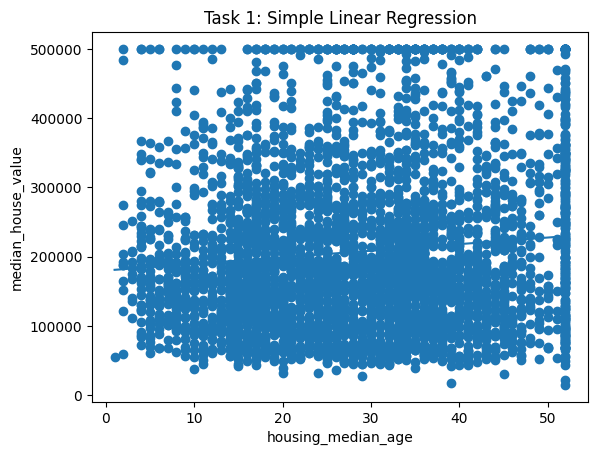

In [14]:
# 1) Scatter + regression line
plt.figure()
plt.scatter(X_test, y_test)
# line using sorted x
x_line = np.sort(X_test["housing_median_age"].values).reshape(-1, 1)
y_line = model1.predict(x_line)
plt.plot(x_line, y_line)
plt.xlabel("housing_median_age")
plt.ylabel("median_house_value")
plt.title("Task 1: Simple Linear Regression")
plt.show()

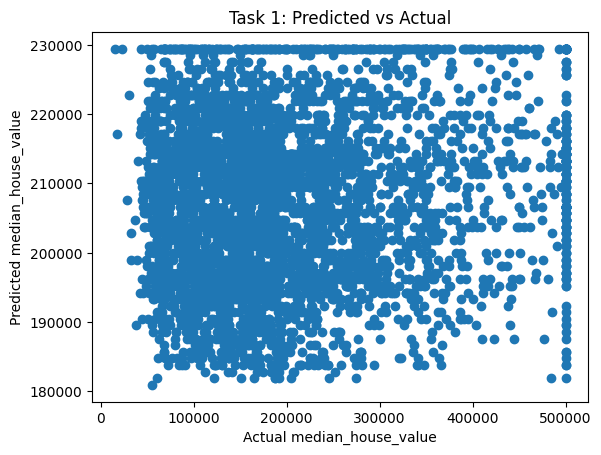

In [15]:
# 2) Predicted vs Actual
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual median_house_value")
plt.ylabel("Predicted median_house_value")
plt.title("Task 1: Predicted vs Actual")
plt.show()

### Assumptions of Linear Regression 


- Linear relationship between X and y  
- Errors are normally distributed (approximately)  
- Constant variance of errors (homoscedasticity)  
- Observations are independent  


# Task 2: Multiple Linear Regression (All Features)

**Goal:** Build a linear regression model using **all features** (except `median_house_value`) to predict `median_house_value`.

Following the same **7-step ML pipeline**.


## 1️⃣ Data Retrieval and Collection

We already loaded and cleaned the dataset in Task 1.  
Now we separate:
- **X (all features)** except label
- **y (label)** = `median_house_value`


In [16]:
X2 = df.drop(columns=["median_house_value"])
y2 = df["median_house_value"]

X2.head(), y2.head()

(   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.23     37.88                41.0        880.0           129.0   
 1    -122.22     37.86                21.0       7099.0          1106.0   
 2    -122.24     37.85                52.0       1467.0           190.0   
 3    -122.25     37.85                52.0       1274.0           235.0   
 4    -122.25     37.85                52.0       1627.0           280.0   
 
    population  households  median_income ocean_proximity  
 0       322.0       126.0         8.3252        NEAR BAY  
 1      2401.0      1138.0         8.3014        NEAR BAY  
 2       496.0       177.0         7.2574        NEAR BAY  
 3       558.0       219.0         5.6431        NEAR BAY  
 4       565.0       259.0         3.8462        NEAR BAY  ,
 0    452600.0
 1    358500.0
 2    352100.0
 3    341300.0
 4    342200.0
 Name: median_house_value, dtype: float64)

## 2️⃣ Data Cleaning

We already handled missing `total_bedrooms` using median imputation.

We still need to handle **categorical data**:
- `ocean_proximity` is categorical, so we must encode it for regression.


In [17]:

# Check missing values (again, because Task 2 uses ALL features)

df.isna().sum().sort_values(ascending=False)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [18]:

# Handle missing values 

df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

# Verify after cleaning
df.isna().sum().sort_values(ascending=False).head()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
dtype: int64

## 3️⃣ Feature Design

- Numeric features are **scaled** using `StandardScaler` (optional but helpful).
- `ocean_proximity` is **one-hot encoded** using `OneHotEncoder`.

We drop the first category in one-hot encoding to avoid the **dummy variable trap**.


In [ ]:

# Use all features except the label

X2 = df.drop(columns=["median_house_value"])
y2 = df["median_house_value"]

X2.head(), y2.head()


(   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.23     37.88                41.0        880.0           129.0   
 1    -122.22     37.86                21.0       7099.0          1106.0   
 2    -122.24     37.85                52.0       1467.0           190.0   
 3    -122.25     37.85                52.0       1274.0           235.0   
 4    -122.25     37.85                52.0       1627.0           280.0   
 
    population  households  median_income ocean_proximity  
 0       322.0       126.0         8.3252        NEAR BAY  
 1      2401.0      1138.0         8.3014        NEAR BAY  
 2       496.0       177.0         7.2574        NEAR BAY  
 3       558.0       219.0         5.6431        NEAR BAY  
 4       565.0       259.0         3.8462        NEAR BAY  ,
 0    452600.0
 1    358500.0
 2    352100.0
 3    341300.0
 4    342200.0
 Name: median_house_value, dtype: float64)

In [20]:
# Identify numeric and categorical columns

num_cols = X2.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X2.columns if c not in num_cols]  # e.g., ocean_proximity

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)


Numeric columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Categorical columns: ['ocean_proximity']


In [21]:
# Feature scaling + One-hot encoding setup

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),  # scaling numeric
        ("cat", OneHotEncoder(handle_unknown="ignore", drop="first"), cat_cols)  # encoding categorical
    ]
)

preprocess


,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. `

## 4️⃣ Algorithm Selection

We again use **Multiple Linear Regression**:
- Output is continuous (price)
- We want to use many factors together to better predict price.


In [22]:
# Multiple Linear Regression

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## 5️⃣ Loss Function Selection

We use the same loss: **Mean Squared Error (MSE)**.


In [23]:

# We use Mean Squared Error (MSE) for evaluation

from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error


<function sklearn.metrics._regression.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>

## 6️⃣ Model Learning (Training)

We build a pipeline:
1) Preprocess numeric + categorical features  
2) Train Linear Regression model


In [25]:
# Train-test split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

num_cols = X2.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X2.columns if c not in num_cols]

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", drop="first"), cat_cols)
    ]
)

model2 = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

model2.fit(X2_train, y2_train)
model2

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers cont

## 7️⃣ Model Evaluation

We compute:
- **MSE**
- **R² Score**


In [26]:
y2_pred = model2.predict(X2_test)

mse2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)

mse2, r2_2

(4908476721.156619, 0.6254240620553604)

### 📈 Model Interpretation 

- **Intercept:** base predicted value when all (processed) features are 0  
- **Coefficients:** effect of each feature on prediction

⚠️ Since numeric features are **standardized**, their coefficients represent:
> change in prediction for a **1 standard deviation** increase in that feature.

For `ocean_proximity` (one-hot), coefficients represent effect compared to the **dropped baseline category**.


In [27]:
# Extract intercept and coefficients with names
pre = model2.named_steps["preprocess"]
feature_names = pre.get_feature_names_out()

coefs = model2.named_steps["model"].coef_
intercept = model2.named_steps["model"].intercept_

intercept

np.float64(219899.77658329843)

In [28]:
coef_table = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefs
})
coef_table["abs"] = coef_table["Coefficient"].abs()
coef_table = coef_table.sort_values("abs", ascending=False).drop(columns="abs")

coef_table

,Feature,Coefficient
9,cat__ocean_proximity_ISLAND,136125.072615
7,num__median_income,75167.774766
1,num__latitude,-54415.696144
0,num__longitude,-53826.648016
5,num__population,-43403.432427
4,num__total_bedrooms,43068.181842
8,cat__ocean_proximity_INLAND,-39786.656161
6,num__households,18382.196324
2,num__housing_median_age,13889.866189
3,num__total_rooms,-13094.251162


### Model Comparison (Task 1 vs Task 2)

- **Performance:** Task 2 performs much better because it uses many important predictors (especially `median_income`, location, etc.).
- **Interpretability:** Task 1 is easiest to interpret (only one slope + intercept), but it has weak predictive power.
- **Why multiple features help:** House prices depend on many factors; using only house age ignores most of them.


## Discussion and Conclusion
In this lab, a linear regression approach was applied to predict house prices by following a complete machine learning workflow, including data preparation, model training, and evaluation. The simple linear regression model that relied solely on housing median age performed poorly, suggesting that the age of a house by itself has very limited explanatory power when it comes to predicting housing prices.On the other hand, the multiple linear regression model, which incorporated all available features, produced noticeably stronger results. This improvement highlights the importance of considering a combination of factors such as median income, geographic location, and population-related variables when modeling housing prices. These features collectively capture the complexity of the housing market more effectively than a single variable.
Overall, the findings demonstrate that although simple models are easier to understand and interpret, they often lack predictive strength for complex, real world problems. In contrast, multi feature regression models are better suited for practical applications, as they provide higher accuracy and a more realistic representation of the underlying relationships in the data.

